In [112]:
#from google.colab import drive
import numpy as np
#from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import time
#import statistics
import pandas as pd
import sqlite3
import os.path
import seaborn as sns; sns.set()

In [2]:
#drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#fn = "/content/gdrive/My Drive/chess_data/chessDB.db"
fn = "chessDB.db"

In [3]:
conn = sqlite3.connect(fn)
c = conn.cursor()
#c.execute("SELECT * FROM users;")
#users = c.fetchall()
#print("Number of users: ", len(users))

In [116]:
user_date_df = pd.read_sql_query("SELECT users.uid, min(user_events.date) FROM users INNER JOIN user_events ON users.uid = user_events.user_id GROUP BY users.uid;", conn)

In [117]:
user_date_df.head(20)

,uid,min(user_events.date)
0,12435050,1992-02-02
1,12435066,1991-11-24
2,12435088,2017-05-20
3,12435092,1994-11-20
4,12435105,1992-09-12
5,12435108,1999-08-18
6,12435118,1993-02-23
7,12435133,1991-11-10
8,12435144,1995-07-15
9,12435145,2008-04-26


In [118]:
year_count = user_date_df.groupby('min(user_events.date)').count()

In [119]:
year_count['cumsum'] = year_count['uid'].cumsum()

# Number of players who register every day

In [120]:
year_count.index = pd.to_datetime(year_count.index)

In [121]:
year_count[-100:]

,uid,cumsum
min(user_events.date),,
2018-03-10,1,290301
2018-03-29,1,290302
2018-03-30,1,290303
2018-03-31,1,290304
2018-04-05,1,290305
2018-04-07,1,290306
2018-04-08,1,290307
2018-04-10,1,290308
2018-04-13,1,290309


Text(0, 0.5, 'Number of chess players')

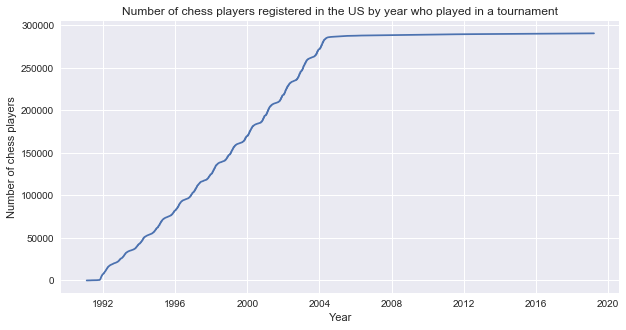

In [122]:
plt.figure(figsize=(10, 5))
plt.plot(year_count.index, year_count['cumsum'].values)
plt.title("Number of chess players registered in the US by year who played in a tournament")
plt.xlabel("Year")
plt.ylabel("Number of chess players")

Slope from 1992 to 2004 and 2004 to 2019

In [138]:
year_count.index[110], year_count.index[4500]

(Timestamp('1992-01-04 00:00:00'), Timestamp('2004-04-02 00:00:00'))

In [141]:
len(year_count)

6530

In [140]:
slope1 = (year_count['cumsum'].values[4500] - year_count['cumsum'].values[110]) / (4500 - 110)
slope1

62.515034168564924

In [142]:
slope2 = (year_count['cumsum'].values[6529] - year_count['cumsum'].values[4500]) / (6529 - 4500)
slope2

3.9310004928536224

From 1992 to 2004, we see about 63 people new people registering and playing in a tournament every year. This has droped significantly down to 4 from 2004 - present

# Average rating and standard deviation by year

In [4]:
ratings_df = pd.read_sql_query("SELECT date, user_events.reg_after, users.uid FROM users INNER JOIN user_events ON users.uid = user_events.user_id;", conn)

In [5]:
ratings_df.head()

,date,reg_after,uid
0,1996-08-25,1385 (P5),12683802
1,1994-12-10,735 (P8),12632612
2,1994-11-06,711 (P4),12632612
3,2001-02-10,576 (P5),12831758
4,1993-04-15,None,12582004


In [6]:
ratings_date_df = pd.DataFrame()

Rows are dates (one date column), columns is the rating for each uid (300k uid columns)

In [8]:
dates = list(sorted(set(ratings_df['date'])))

In [11]:
len(dates)

10057

In [17]:
dates[0], dates[-2]

('1991-01-28', '2019-04-09')

In [9]:
ratings_date_df['dates'] = dates

In [10]:
ratings_date_df.head()

,dates
0,1991-01-28
1,1991-01-31
2,1991-02-18
3,1991-02-26
4,1991-03-17


In [12]:
len(ratings_df)

3283074

Let's just keep track of rating by year, and the latest rating for that year

In [52]:
uid_date_d = {}
start = time.time()
for index, row in ratings_df.iterrows():
    if index % 100000 == 0:
        print(index)
    if not row.uid in uid_date_d.keys():
        uid_date_d[row.uid] = {}
    year = row.date[:4]
    #uid_date_d[row.uid][row.date] = row.reg_after
    # get rid of provisional part
    uid_date_d[row.uid][year] = int(row.reg_after.split(" ")[0]) if row.reg_after else None
end = time.time()
print(end - start, " seconds")

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
485.11591267585754  seconds


In [27]:
len(list(uid_date_d.keys()))

290434

In [28]:
uid_date_d[12683802]

{'1996': '1385 (P5)'}

In [48]:
#uid_date_d[12683802]['1996'].split(" ")[0]
int("1385")

1385

In [47]:
"1385".split(" ")[0]

'1385'

In [29]:
uid_set = set(ratings_df['uid'])

In [30]:
uids = list(uid_set)

In [31]:
len(uids)

290434

In [33]:
# years: 1991 - 2019
years = [str(x) for x in range(1991, 2020)]
years

['1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [53]:
for num, uid in enumerate(uids):
    for index, year in enumerate(years):
        if year not in uid_date_d[uid]:
            try:
                uid_date_d[uid][year] = uid_date_d[uid][years[index - 1]]
            except:
                uid_date_d[uid][year] = "NA"
        elif uid_date_d[uid][year] == None:
            try:
                uid_date_d[uid][year] = uid_date_d[uid][years[index - 1]]
            except:
                uid_date_d[uid][year] = "NA"

In [63]:
df = pd.DataFrame(index=years)
start = time.time()
for num, uid in enumerate(uids):
    if num % 10000 == 0:
        print(num)
    u = []
    for year in years:
        u.append(uid_date_d[uid][year])
    df[uid] = u
end = time.time()
print(end - start, "seconds")

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000


In [70]:
df.mean(axis=1)

1991    1460.779968
1992    1462.073849
1993    1469.781914
1994    1473.684966
1995    1472.955166
1996    1471.151568
1997    1467.139150
1998    1461.415774
1999    1454.138031
2000    1447.791202
2001    1440.972352
2002    1439.097759
2003    1436.017012
2004    1437.284685
2005    1445.236750
2006    1451.088230
2007    1455.757177
2008    1460.377285
2009    1464.973293
2010    1469.796023
2011    1473.788920
2012    1478.169129
2013    1481.506817
2014    1485.050639
2015    1487.636914
2016    1489.390782
2017    1491.455758
2018    1492.500993
2019    1494.856873
dtype: float64

In [72]:
df_aggs = df.copy(deep=True)
df_aggs['mean'] = df.mean(axis=1)
df_aggs['std'] = df.std(axis=1)

In [73]:
df_aggs.head()

,12582912,12582913,12582914,12582916,12582917,12582918,12582919,12582920,12582921,12582922,...,12582904,12582905,12582906,12582907,12582908,12582909,12582910,12582911,mean,std
1991,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,1460.779968,401.268542
1992,1451,2356,NA,1125,1535,1203,1237,1522,882,792,...,417,619,1528,1377,1765,1056,870,607,1462.073849,397.810118
1993,1434,2259,1213,1125,1535,1203,1237,1574,882,792,...,545,619,1501,1291,1355,756,1017,607,1469.781914,397.131193
1994,1485,2259,1125,1125,1535,1203,1237,1574,882,792,...,618,619,1477,1646,1355,756,1017,607,1473.684966,397.726332
1995,1485,2259,1125,1192,1535,1203,1237,1574,882,792,...,618,619,1481,1760,1355,781,1017,607,1472.955166,399.040183


Text(0, 0.5, 'Average rating')

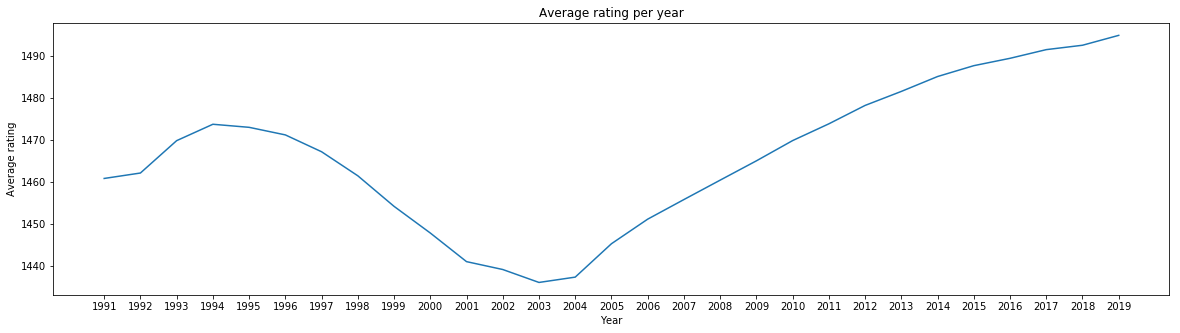

In [77]:
plt.figure(figsize=(20, 5))
plt.plot(df_aggs.index, df_aggs['mean'].values)
plt.title("Average rating per year")
plt.xlabel("Year")
plt.ylabel("Average rating")

The rating average appears to peak around 1994, dip down near 2003 and has been on the increase ever since.

# Rating by gender per year

In [87]:
female_df = pd.read_sql_query("SELECT users.uid, users.state FROM users WHERE users.gender = 'F';", conn)

In [88]:
len(female_df)

46942

In [89]:
male_df = pd.read_sql_query("SELECT users.uid, users.state FROM users WHERE users.gender = 'M';", conn)

In [90]:
len(male_df)

401926

In [91]:
female_uids = female_df['uid']
male_uids = male_df['uid']

In [95]:
female_df = df_aggs.loc[:, list(female_uids)]
male_df = df_aggs.loc[:, list(male_uids)]

C:\Users\Michael\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [98]:
male_df_aggs = male_df.copy(deep=True)
male_df_aggs['mean'] = male_df.mean(axis=1)
male_df_aggs['std'] = male_df.std(axis=1)

In [99]:
female_df_aggs = female_df.copy(deep=True)
female_df_aggs['mean'] = female_df.mean(axis=1)
female_df_aggs['std'] = female_df.std(axis=1)

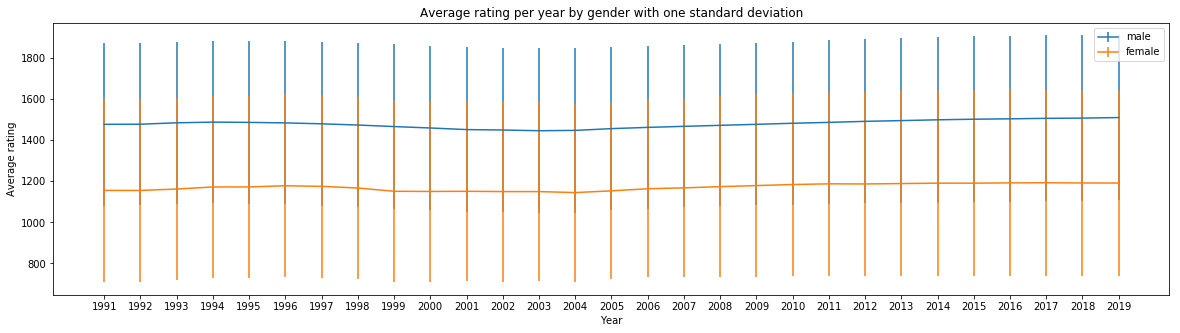

In [107]:
plt.figure(figsize=(20, 5))
plt.errorbar(male_df_aggs.index, male_df_aggs['mean'].values, male_df_aggs['std'].values, label="male")
plt.errorbar(female_df_aggs.index, female_df_aggs['mean'].values, female_df_aggs['std'].values, label="female")
#plt.errorbar(df_aggs.index, df_aggs['mean'].values, df_aggs['std'].values, label="average")
plt.title("Average rating per year by gender with one standard deviation")
plt.xlabel("Year")
plt.ylabel("Average rating")
plt.legend()

There is a significant difference between the average male and female chess ratings and the difference, about 250 remains relatively consistent over this timeframe. The average for males is about 1450 and for females is about 1200.

In [113]:
ax = sns.lineplot(x="index", y="mean", data=df_aggs)

AttributeError: module 'seaborn' has no attribute 'lineplot'

Try Seaborn again with update version

# Close Connection

In [0]:
conn.close()